## Project Case Scenario 

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?

* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?



In [ ]:
#loading the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [29]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


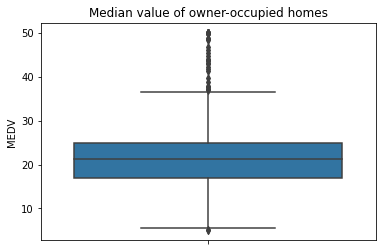

In [49]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y='MEDV',data=boston_df).set(title='Median value of owner-occupied homes')

[Text(0.5, 1.0, 'MEDV variable vs the AGE variable'),
 Text(0.5, 0, 'Age group'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's")]

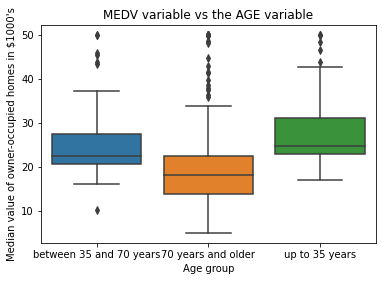

In [88]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = 'up to 35 years'
boston_df.loc[(boston_df['AGE'] >35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'


Boxplot = sns.boxplot(x="age_group", y="MEDV",  data=boston_df)
Boxplot.set(title='MEDV variable vs the AGE variable', xlabel="Age group", ylabel ="Median value of owner-occupied homes in $1000's")

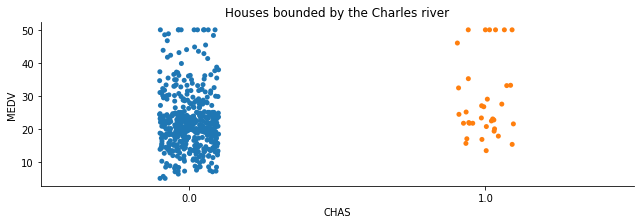

In [89]:
#Provide a  histogram for the Charles river variable
ax=sns.catplot(x='CHAS', y='MEDV', data=boston_df, height = 3, aspect = 3).set(title='Houses bounded by the Charles river')



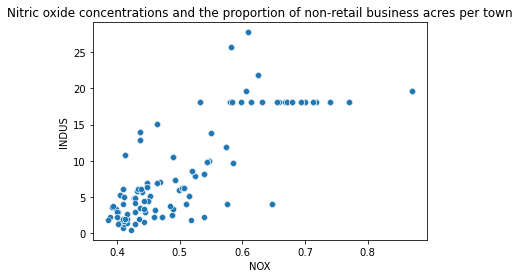

In [90]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail 
#business acres per town. What can you say about the relationship?


ax = seaborn.scatterplot(x='NOX', y='INDUS', data=boston_df).set(title='Nitric oxide concentrations and the proportion of non-retail business acres per town')



Conclusion: There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

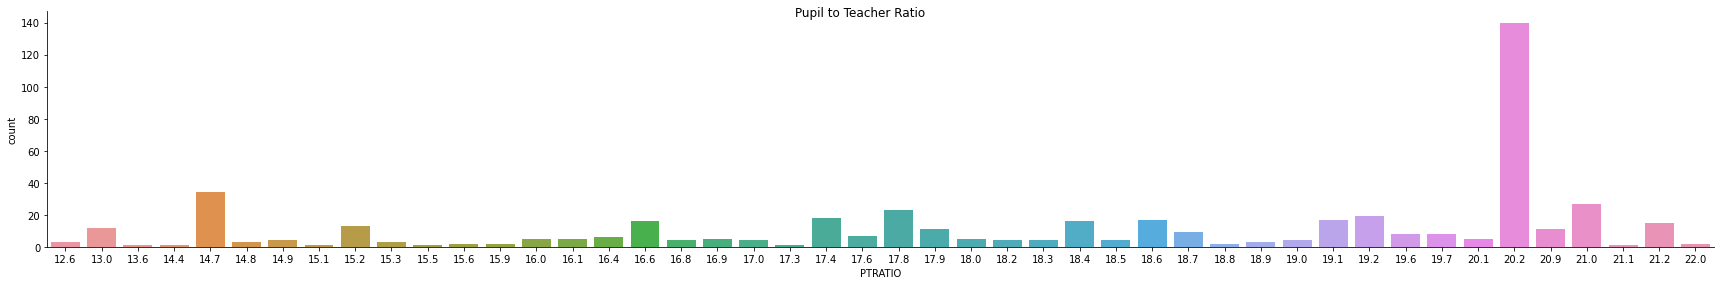

In [91]:
#Create a histogram for the pupil to teacher ratio variable

ax=sns.catplot(x='PTRATIO', kind='count', data=boston_df, height = 4, aspect = 6)
figure =ax.fig.suptitle('Pupil to Teacher Ratio')



# Task 5: Use the appropriate tests to answer the questions provided




### * Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



State the hypothesis

𝐻_0:µ_1=µ_2  ("there is no difference in the median value of houses bounded by the Charles river")

𝐻_1:µ_1≠µ_2  ("there is difference in the median value of houses bounded by the Charles river")


We can use the Levene's Test in Python to check test significance

In [98]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')



LeveneResult(statistic=532.6811164157676, pvalue=5.40253511973145e-95)

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library


In [97]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

In [ ]:
Since p value is less then alpha (0.05)we are rejecting null hypotesis since here is a difference in the median value of houses bounded by the Charles river

### * Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


State the Hypothesis:

𝐻_0:µ1=µ2=µ3  (Median value of owner-occupied homes are equal for different age groups of owners)
𝐻_1:  At least one of the them differ '''

In [74]:

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] >35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)


              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


##### Conclusion: We will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the Median value of owner-occupied homes differ.

### * Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


(0.7636514469209151, 7.913361061238693e-98)

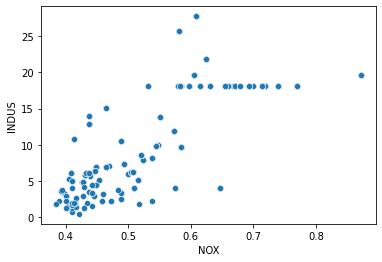

In [92]:

person_result= sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])




##### Conclusion: P value is less then 0.05  -> There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

### * What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State hypothesis:

*   $H\_0: β1$ = 0 (additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes has no effect on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes has effect on the median value of owner occupied homes)


the alpha (α) level = 0.05

In [86]:

## X is the input variables (or independent variables)
X = boston_df['MEDV']
## y is the target/dependent variable
y = boston_df['DIS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.21e-08
Time:                        16:35:22   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: We will not reject null hypoyesis. The coefficient 0.0572 > (α) level  means that additional weighted distance to the five Boston employment centres on the median value of owner occupied homes has no effect on the median value of owner occupied homes